In [1]:
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

plt.style.use('fast')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches

In [14]:
fullTable = Table().read_table("DATA350funding.csv")
fullTable.show()

Name,Address,City,ZIP,County,Schedule change in last year?,How often are your participants permitted to visit?,Individual donors (FT),Religious congregation (FT),Local businesses (FT),Federal grants (FT),State & local grants (FT),Private grants (FT),Fundraising events (FT),None of the above (FT),Other (FT),Funding adequate,Number of people needing food assistance,Money,Space,Storage,Equipment,Distribution of food,Transportation of food,Limited number of staff,Limited number of volunteers,Advanced age of volunteers,Having enough food to meet our needs,Quality of food available,Variety of food available,Other
Bay Path University,588 Longmeadow St,Longmeadow,1106,Hampden,No,Anytime we are open,1,0,0,0,0,0,1,0,nan,Yes,0,0,0,0,0,0,0,0,0,0,0,0,1,nan
First Pioneer Valley Dream Center,133 Main St,Springfield,1105,Hampden,No,Once a week,1,1,0,0,0,0,0,0,nan,No,0,0,0,0,0,0,1,0,0,0,0,0,0,nan
The Cheshire Pantry,191 Church St,Cheshire,1225,Berkshire,No,Monthly,1,1,1,1,1,1,1,0,nan,No,0,1,0,0,0,0,0,0,0,0,0,0,0,nan
Christian Center,193 Robbins Ave,Pittsfield,1201,Berkshire,No,Anytime we are open,1,0,1,1,1,1,1,0,nan,Yes,0,0,0,0,0,0,0,0,0,0,0,0,1,nan
Our community food pantry,222 College Hwy,Southwick,1034,Hampden,No,Once a week,1,1,1,1,1,1,1,0,nan,Yes,0,0,0,0,0,0,0,0,0,0,0,1,0,nan
Community Health Programs,442 Stockbridge Rd,Great Barrington,1230,Berkshire,No,Anytime we are open,1,1,1,1,1,1,1,0,nan,No,0,1,0,0,0,0,0,0,0,0,0,0,0,nan
All Saints & St. Mary's Food Pantry,17 North St,Ware,1082,Hampshire,No,Anytime we are open,1,1,1,0,0,0,0,0,nan,Yes,0,0,0,0,0,0,0,0,0,0,0,0,1,nan
Springfield Technical Community College,"Center for Access Services, Building 7. One Armory Square",Springfield,1105,Hampden,No,"Every other week, or 2x per month",1,0,1,0,1,0,1,0,nan,No,0,1,0,0,0,0,0,0,0,0,0,0,0,nan
South Community Food Pantry,110 South St,Pittsfield,1201,Berkshire,No,Anytime we are open,1,0,1,1,1,1,1,0,nan,No,0,0,0,0,0,0,0,0,0,0,1,0,0,nan
49602 - United Way Pioneer Valley,164 Race St,Holyoke,1040,Hampden,No,"Every other week, or 2x per month",1,0,1,0,1,1,1,0,nan,Yes,1,0,0,0,0,0,0,0,0,0,0,0,0,nan


In [3]:
funding = fullTable.select(0 , 2, 4, 7, 8 , 9 , 10 , 11, 12 , 13 , 16)
funding.show(10)

Name,City,County,Individual donors (FT),Religious congregation (FT),Local businesses (FT),Federal grants (FT),State & local grants (FT),Private grants (FT),Fundraising events (FT),Funding adequate
Bay Path University,Longmeadow,Hampden,1,0,0,0,0,0,1,Yes
First Pioneer Valley Dream Center,Springfield,Hampden,1,1,0,0,0,0,0,No
The Cheshire Pantry,Cheshire,Berkshire,1,1,1,1,1,1,1,No
Christian Center,Pittsfield,Berkshire,1,0,1,1,1,1,1,Yes
Our community food pantry,Southwick,Hampden,1,1,1,1,1,1,1,Yes
Community Health Programs,Great Barrington,Berkshire,1,1,1,1,1,1,1,No
All Saints & St. Mary's Food Pantry,Ware,Hampshire,1,1,1,0,0,0,0,Yes
Springfield Technical Community College,Springfield,Hampden,1,0,1,0,1,0,1,No
South Community Food Pantry,Pittsfield,Berkshire,1,0,1,1,1,1,1,No
49602 - United Way Pioneer Valley,Holyoke,Hampden,1,0,1,0,1,1,1,Yes


In [4]:
counties = funding.select(2, "Funding adequate")
counties = counties.where("Funding adequate" , "No")
counties = counties.group("County")

countyTotal = funding.select("County")
countyTotal = countyTotal.group("County")
countyTotal = countyTotal.column("count")

countyNames = counties.column("County")
countyFreq = counties.column("count")
counties

County,count
Berkshire,11
Franklin,3
Hampden,13
Hampshire,3


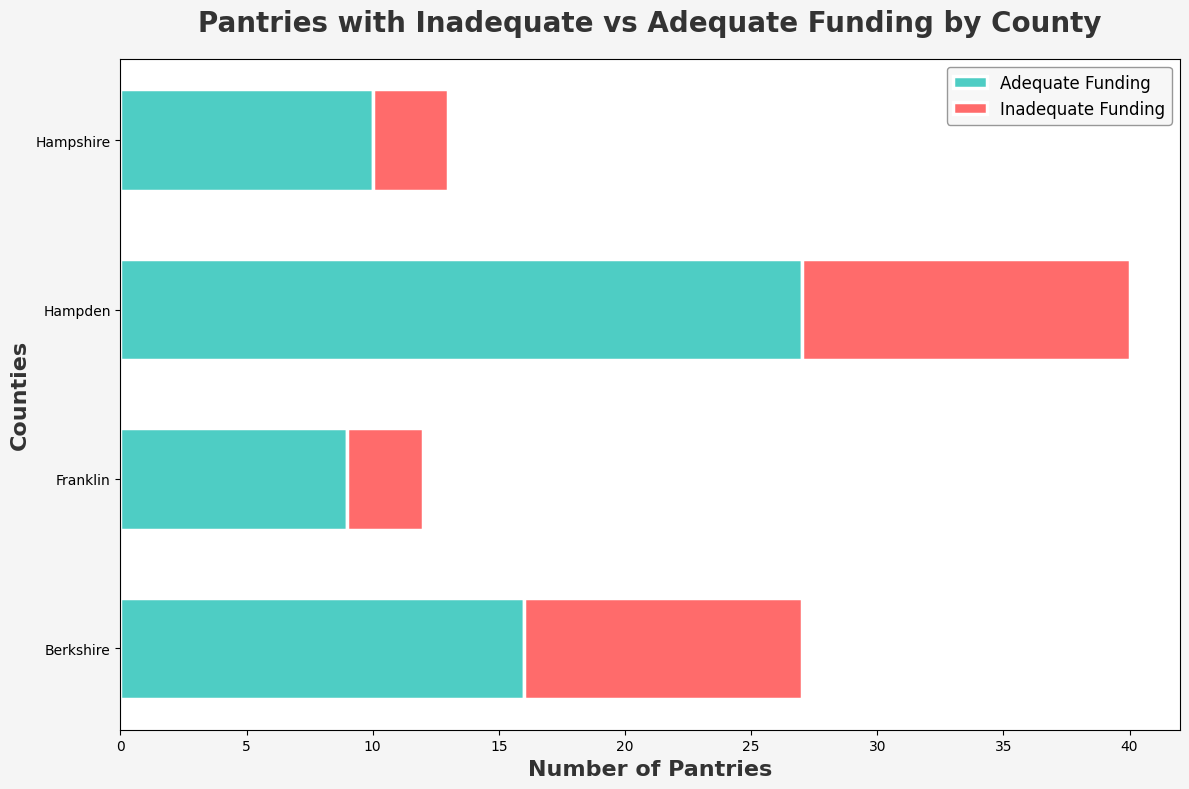

In [5]:
countyAdequate = countyTotal - countyFreq


plt.figure(figsize=(12, 8), facecolor='#F5F5F5')

color_adequate = '#4ECDC4'  
color_inadequate = '#FF6B6B'


plt.barh(countyNames, countyAdequate, color=color_adequate, edgecolor='white', 
         label='Adequate Funding' , height = 0.6 , linewidth = 2.5 )
plt.barh(countyNames, countyFreq, left=countyAdequate, color=color_inadequate, edgecolor='white',
         label='Inadequate Funding', height = 0.6 , linewidth = 2.5)


plt.title('Pantries with Inadequate vs Adequate Funding by County', fontsize=20 , fontweight = 'bold',
         color = '#333333', pad = 20)

plt.xlabel('Number of Pantries', fontsize=16 , fontweight = 'bold' , color = '#333333')
plt.ylabel('Counties', fontsize=16, fontweight = 'bold' , color = '#333333')
plt.legend(loc='upper right', fontsize=12, frameon=True, facecolor='#F5F5F5', 
           edgecolor='gray', framealpha=0.8)

plt.tight_layout()

plt.show()

In [6]:
funding

Name,City,County,Individual donors (FT),Religious congregation (FT),Local businesses (FT),Federal grants (FT),State & local grants (FT),Private grants (FT),Fundraising events (FT),Funding adequate
Bay Path University,Longmeadow,Hampden,1,0,0,0,0,0,1,Yes
First Pioneer Valley Dream Center,Springfield,Hampden,1,1,0,0,0,0,0,No
The Cheshire Pantry,Cheshire,Berkshire,1,1,1,1,1,1,1,No
Christian Center,Pittsfield,Berkshire,1,0,1,1,1,1,1,Yes
Our community food pantry,Southwick,Hampden,1,1,1,1,1,1,1,Yes
Community Health Programs,Great Barrington,Berkshire,1,1,1,1,1,1,1,No
All Saints & St. Mary's Food Pantry,Ware,Hampshire,1,1,1,0,0,0,0,Yes
Springfield Technical Community College,Springfield,Hampden,1,0,1,0,1,0,1,No
South Community Food Pantry,Pittsfield,Berkshire,1,0,1,1,1,1,1,No
49602 - United Way Pioneer Valley,Holyoke,Hampden,1,0,1,0,1,1,1,Yes


In [11]:
def addTotal(table , array , i):
    total = table.column(i)
    array = np.append(array , np.sum(total))
    return array

addTotal(funding, fundingSources , 3)


array([ 76.,  42.,  53.,  25.,  50.,  41.,  44.,  76.])

In [9]:
fundingSources = make_array()

for i in range(3 , 10):
    fundingSources = addTotal(funding , fundingSources , i)

fundingSources

array([ 76.,  42.,  53.,  25.,  50.,  41.,  44.])

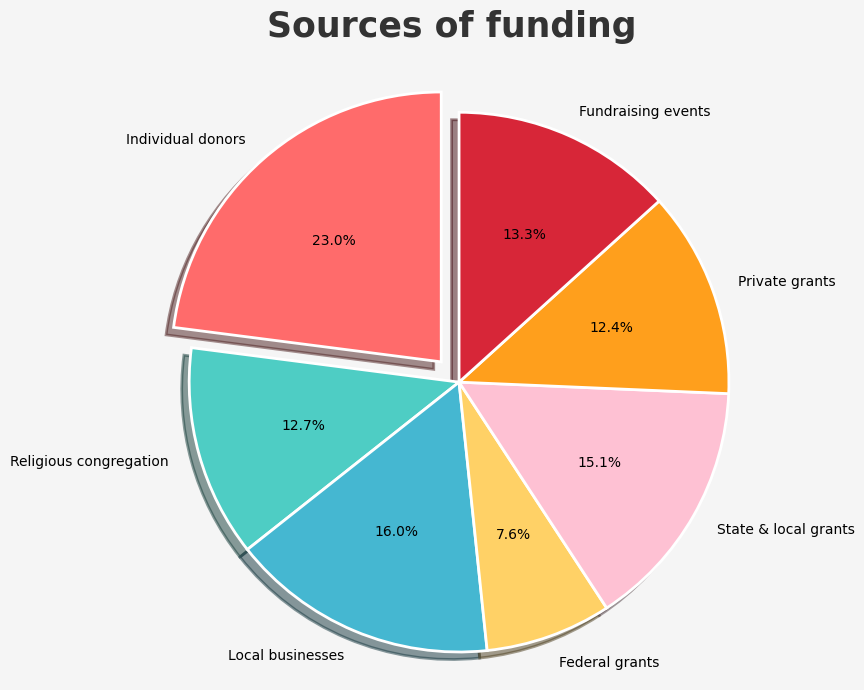

In [13]:
columnNames = ["Individual donors" , "Religious congregation ", "Local businesses", "Federal grants", "State & local grants", "Private grants", "Fundraising events"]

colors = [
    '#FF6B6B',  
    '#4ECDC4',  
    '#45B7D1',  
    '#FFD166',  
    '#FEC1D3',  
    '#FF9F1C',  
    '#D72638'   
]

plt.figure( figsize = (10 , 8))

plt.pie(fundingSources, 
        labels = columnNames, 
        autopct = '%1.1f%%' , 
        startangle=90,
        colors = colors,
        shadow = True,
        explode=[0.1] + [0]* (len(fundingSources)-1), 
        wedgeprops={'edgecolor': 'white', 'linewidth': 2}
       )

plt.title("Sources of funding" , fontsize = 25 , 
         fontweight = 'bold', color = '#333333',
         pad = 20)

plt.gca().set_facecolor('#F5F5F5')
plt.gcf().set_facecolor('#F5F5F5')

plt.axis("equal")
plt.show()

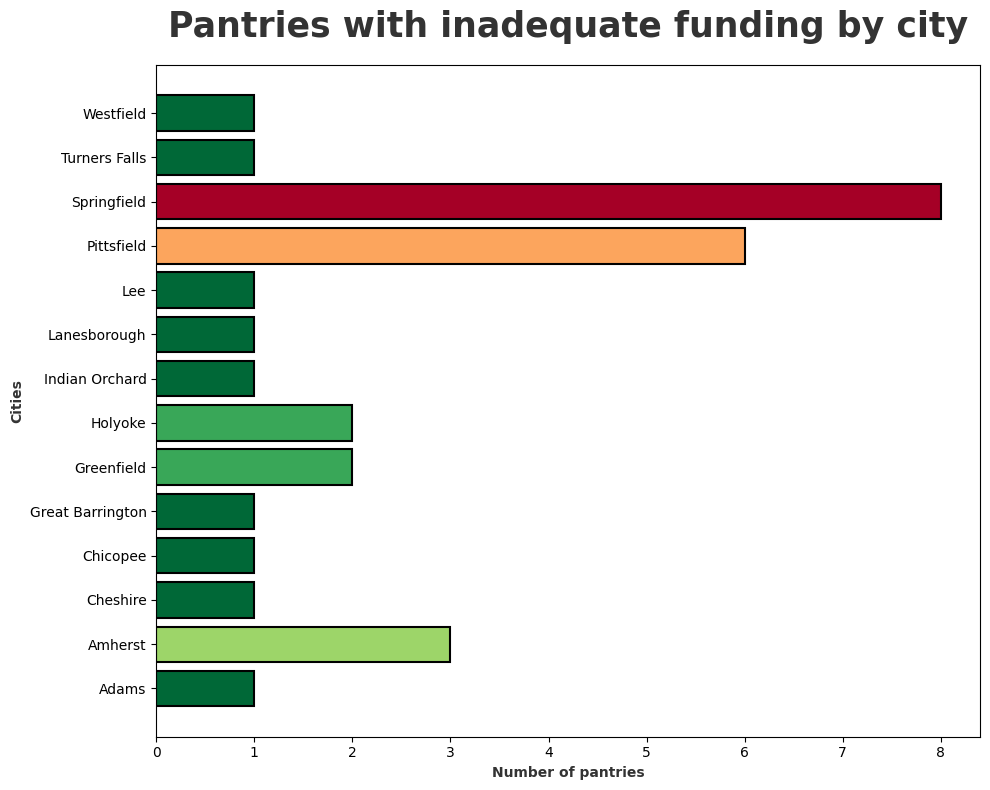

In [12]:
temp = fullTable.select("City" , 6, 16 )
temp = temp.where("Funding adequate" , 'No')
temp = temp.group("City")

cmap = plt.get_cmap('RdYlGn_r')  # Updated to use plt.get_cmap()
norm = plt.Normalize(min(temp.column("count")), max(temp.column("count")))
colors = [cmap(norm(count)) for count in temp.column("count")]

plt.figure(figsize = (10 , 8))
plt.barh(temp.column("City"),temp.column("count") , edgecolor = "black" , linewidth = 1.5 , color = colors)

plt.title("Pantries with inadequate funding by city" , fontsize = 25 , fontweight = 'bold',
          pad = 20, color = '#333333')

plt.ylabel("Cities" , fontweight = 'bold' , color = '#333333')
plt.xlabel("Number of pantries" , fontweight = 'bold' , color = '#333333')

plt.tight_layout()

plt.show()

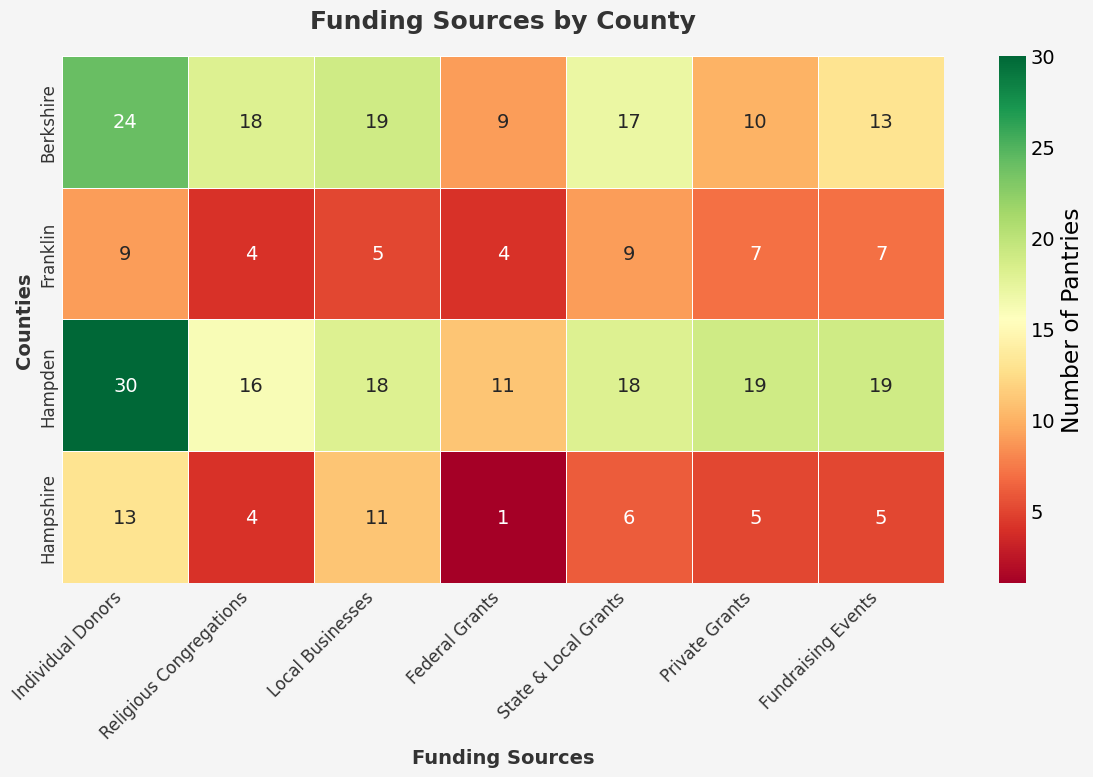

In [229]:
heat = fullTable.select(4, 7, 8, 9, 10, 11, 12, 13)
heat = heat.group("County", np.sum)

heat_df = heat.to_df()
heat_df.columns = ['County', 'Individual Donors', 'Religious Congregations', 'Local Businesses', 
                   'Federal Grants', 'State & Local Grants', 'Private Grants', 'Fundraising Events']
heat_df.set_index('County', inplace=True)


plt.figure(figsize=(12, 8), facecolor='#F5F5F5')


sns.heatmap(heat_df, annot=True, fmt='d', cmap='RdYlGn', 
            cbar_kws={'label': 'Number of Pantries'}, 
            linewidths=0.5, linecolor='white')


plt.title('Funding Sources by County', fontsize=18, fontweight='bold', color='#333333', pad=20)
plt.xlabel('Funding Sources', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Counties', fontsize=14, fontweight='bold', color='#333333')

plt.xticks(rotation=45, ha='right', fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')


plt.gca().set_facecolor('#F5F5F5')


plt.tight_layout()

plt.savefig('funding_sources_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()